In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
passenger_data = pd.read_csv("../../data/titanic_train.csv")
passenger_data = passenger_data.drop(["Cabin", "Ticket", "Name", "Embarked", "PassengerId"], axis=1)
passenger_data = passenger_data.fillna({"Age": passenger_data["Age"].mean()})

passenger_data = passenger_data.replace("female", 0)
passenger_data = passenger_data.replace("male", 1)

passenger_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,29.567002,0,0,8.0500
1,1,1,1,51.000000,0,0,26.5500
2,1,3,0,29.567002,1,1,22.3583
3,0,3,1,29.567002,0,0,7.0500
4,1,2,0,29.000000,0,0,10.5000
...,...,...,...,...,...,...,...
752,0,1,1,29.567002,0,0,0.0000
753,0,3,1,30.000000,1,0,16.1000
754,1,1,0,24.000000,0,0,69.3000
755,1,3,0,2.000000,0,1,12.2875


In [4]:
from sklearn.model_selection import train_test_split
x = passenger_data.drop(columns = "Survived")
y = passenger_data[["Survived"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

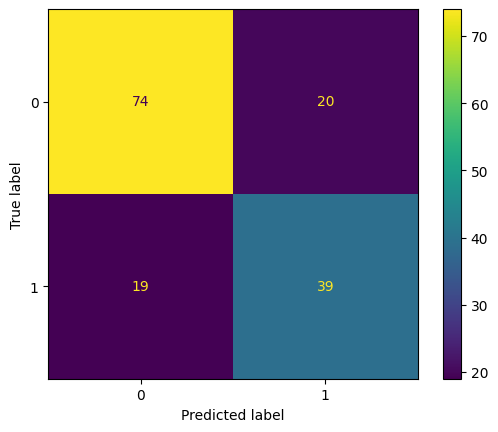

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth=10)
classifier.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

In [13]:
from sklearn.metrics import matthews_corrcoef

In [20]:
matthews_corrcoef(y_test, classifier.predict(x_test))

0.4581795095163959

In [21]:
matthews_corrcoef(y_train, classifier.predict(x_train))

0.8105179458076212

In [22]:
passenger_data_test = pd.read_csv("../../data/titanic_test.csv")
passenger_data_test = passenger_data_test.drop(["Cabin", "Ticket", "Name", "Embarked", "PassengerId"], axis=1)
passenger_data_test = passenger_data_test.fillna({"Age": passenger_data["Age"].mean()})

passenger_data_test = passenger_data_test.replace("female", 0)
passenger_data_test = passenger_data_test.replace("male", 1)

passenger_data_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,25.000000,0,0,0.0000
1,0,3,1,26.000000,1,0,7.8542
2,0,3,1,17.000000,0,0,7.1250
3,0,3,0,29.567002,8,2,69.5500
4,0,3,1,29.567002,0,0,7.8958
...,...,...,...,...,...,...,...
129,0,2,1,18.000000,0,0,73.5000
130,0,1,1,40.000000,0,0,0.0000
131,0,2,1,36.500000,0,2,26.0000
132,1,2,0,19.000000,1,0,26.0000


In [23]:
x_test = passenger_data_test.drop(columns = "Survived")
y_test = passenger_data_test[["Survived"]]
matthews_corrcoef(y_test, classifier.predict(x_test))

0.6467639012116649